In [ ]:
# Install R packages in Google Colab
install.packages("igraph")
install.packages("ggplot2")
install.packages("ggraph")

# Load the installed packages
library(igraph)
library(ggplot2)
library(ggraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
# Create a simple social network (graph)
nodes <- c("Alice", "Bob", "Tony", "David", "Eve")
edges <- data.frame(from = c("Alice", "Bob", "Tony", "David", "Alice"),
                    to = c("Bob", "Tony", "David", "Eve", "Eve"))

In [ ]:
social_network <- graph_from_data_frame(edges, vertices = nodes, directed = FALSE)

Warning message:
“`layout.circle()` was deprecated in igraph 2.1.0.
ℹ Please use `layout_in_circle()` instead.”


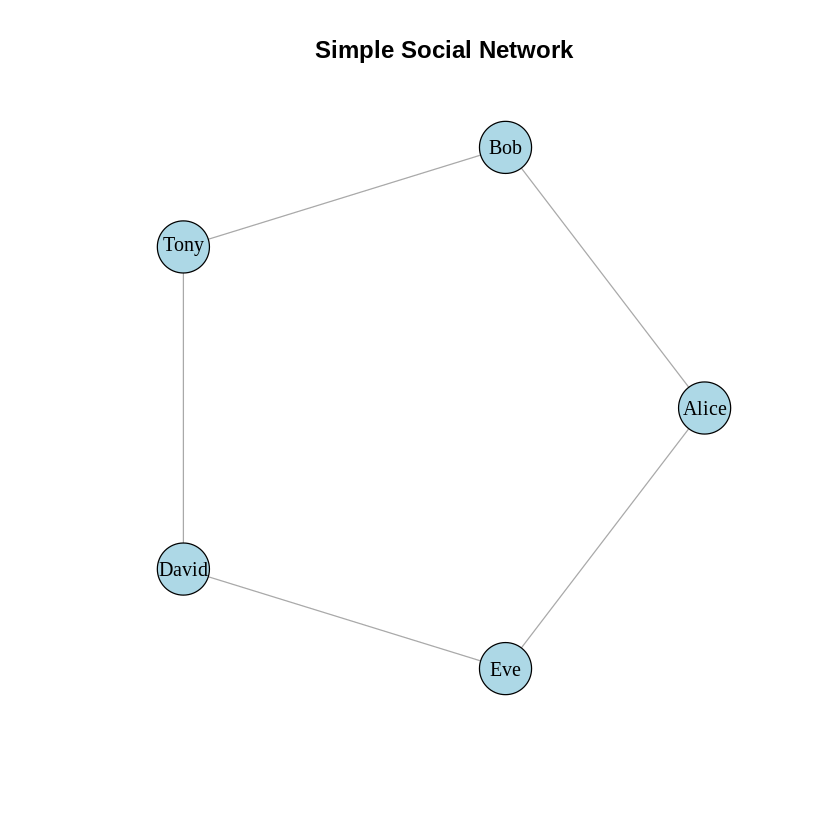

In [ ]:
plot(social_network,
      layout =layout.circle(social_network),
      vertex.label.color = "black",
      vertex.size = 20,
      vertex.color = "lightblue",
      edge.arrow.size = 0.5,
      main = "Simple Social Network")

In [ ]:
# Calculate basic network metrics
cat("Number of nodes:", vcount(social_network), "\n")
cat("Number of edges:", ecount(social_network), "\n")
cat("Degree centrality:\n")
degree(social_network)
cat("Betweenness centrality:\n")
betweenness(social_network)
cat("Closeness centrality:\n")
closeness(social_network)

Number of nodes: 5 
Number of edges: 5 
Degree centrality:


Alice   Bob  Tony David   Eve 
    2     2     2     2     2

Betweenness centrality:


Alice   Bob  Tony David   Eve 
    1     1     1     1     1

Closeness centrality:


Alice       Bob      Tony     David       Eve 
0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

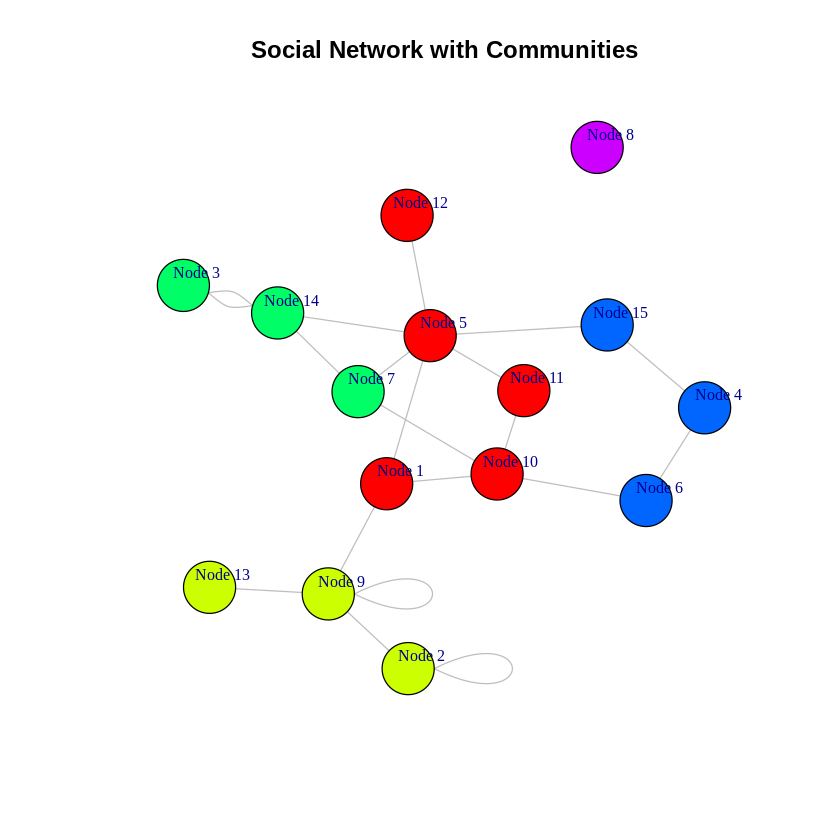

In [ ]:
# Load igraph library
library(igraph)

# Set seed for reproducibility
set.seed(1)

# Create nodes and random edges
nodes <- paste("Node", 1:15)
edges <- data.frame(
  from = sample(nodes, 20, replace = TRUE),
  to = sample(nodes, 20, replace = TRUE)
)

# Create the graph
social_network <- graph_from_data_frame(edges, vertices = nodes, directed = FALSE)

# Detect communities
communities <- cluster_louvain(social_network)
membership <- membership(communities)

# Use a layout that supports disconnected graphs
layout <- layout_with_fr(social_network)

# Assign colors based on community membership
community_colors <- rainbow(max(membership))

# Plot the graph with communities
plot(social_network, layout = layout, vertex.color = community_colors[membership],
     vertex.size = 20, vertex.label.cex = 0.8, vertex.label.dist = 1,
     edge.color = "gray", main = "Social Network with Communities")
